In [2]:
# Data Processing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [16]:
df=pd.read_csv('../../data/raw/vile.csv')
df.drop("To Date", axis=1, inplace=True)
df.head()

,From Date,AT,RH
0,01-06-2019 00:00,NaN,NaN
1,01-06-2019 01:00,NaN,NaN
2,01-06-2019 02:00,NaN,NaN
3,01-06-2019 03:00,NaN,NaN
4,01-06-2019 04:00,NaN,NaN


In [17]:
import pandas as pd

# Replace 'input.csv' with the path to your CSV file
input_file = '../../data/raw/vile.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(input_file)

# Replace all 'None' values with an empty string
df = df.replace('None', '')

# Replace 'output.csv' with the desired output file name
output_file = '../../data/raw/vile.csv'

# Save the modified DataFrame to a new CSV file
df.to_csv(output_file, index=False)

In [18]:
df=pd.read_csv('../../data/raw/vile.csv')
df.drop("To Date", axis=1, inplace=True)
df.head()

,From Date,AT,RH
0,01-06-2019 00:00,NaN,NaN
1,01-06-2019 01:00,NaN,NaN
2,01-06-2019 02:00,NaN,NaN
3,01-06-2019 03:00,NaN,NaN
4,01-06-2019 04:00,NaN,NaN


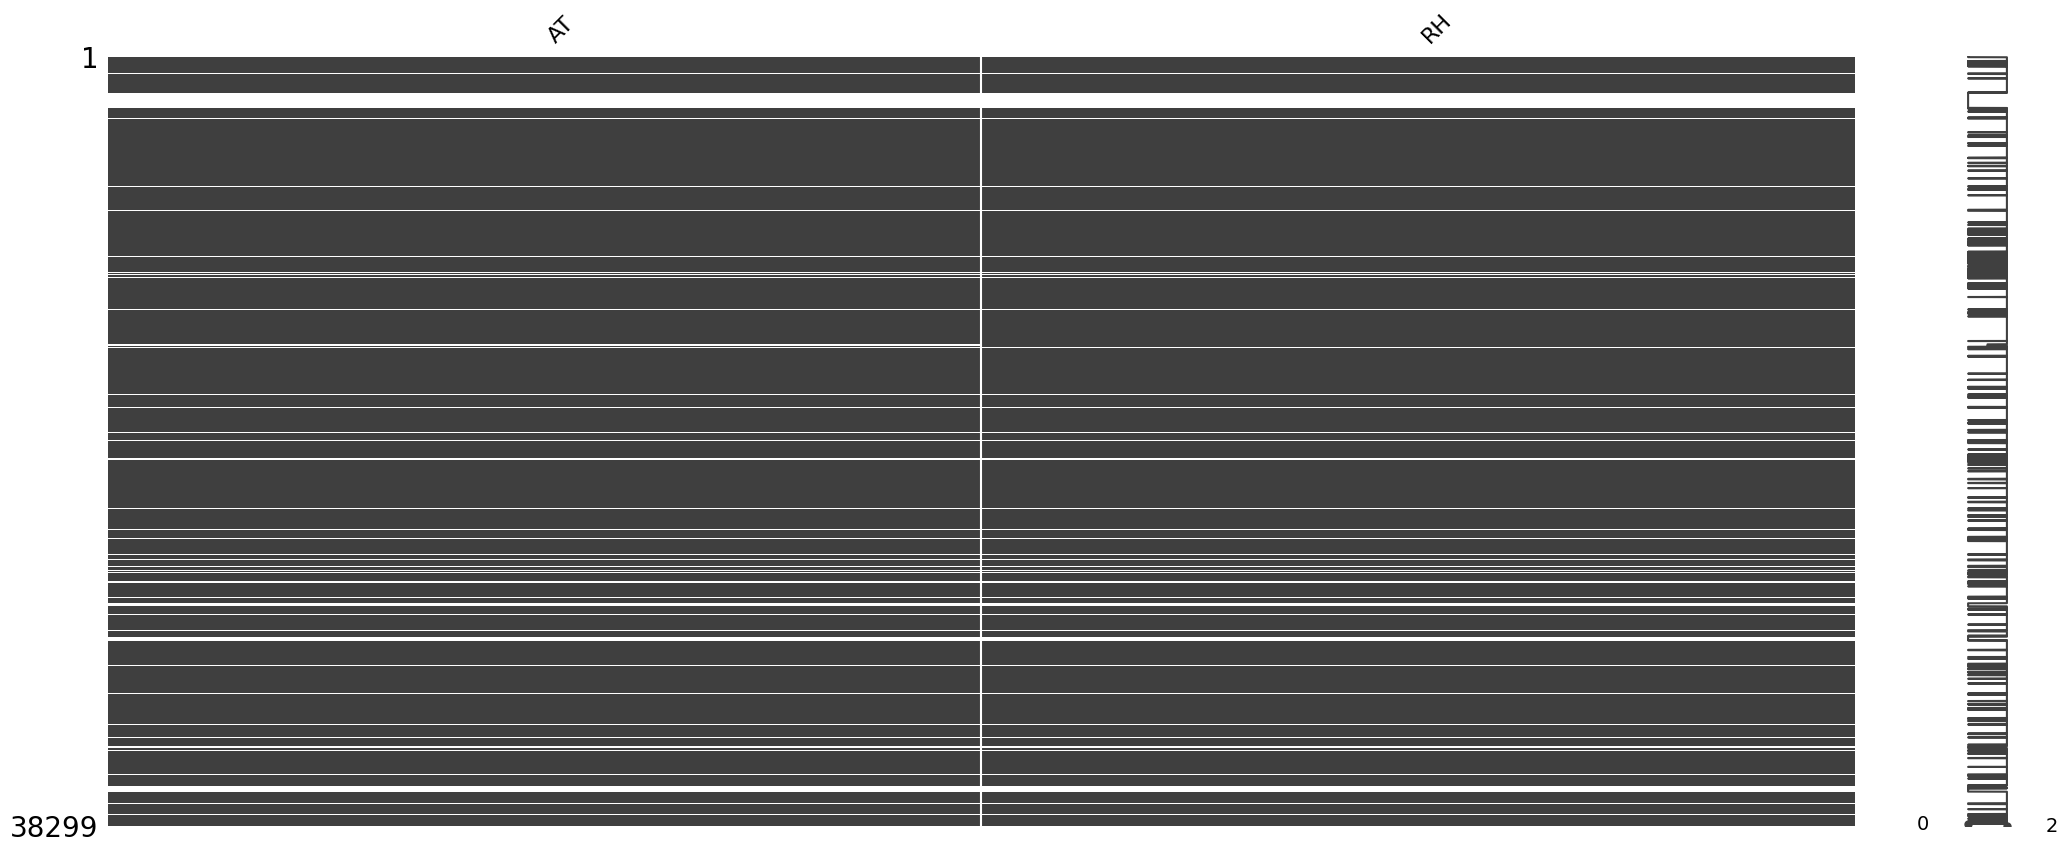

In [22]:
msno.matrix(df.iloc[:,1:])
plt.show()

In [ ]:
# df.drop("BP", axis=1, inplace=True)

<AxesSubplot:>

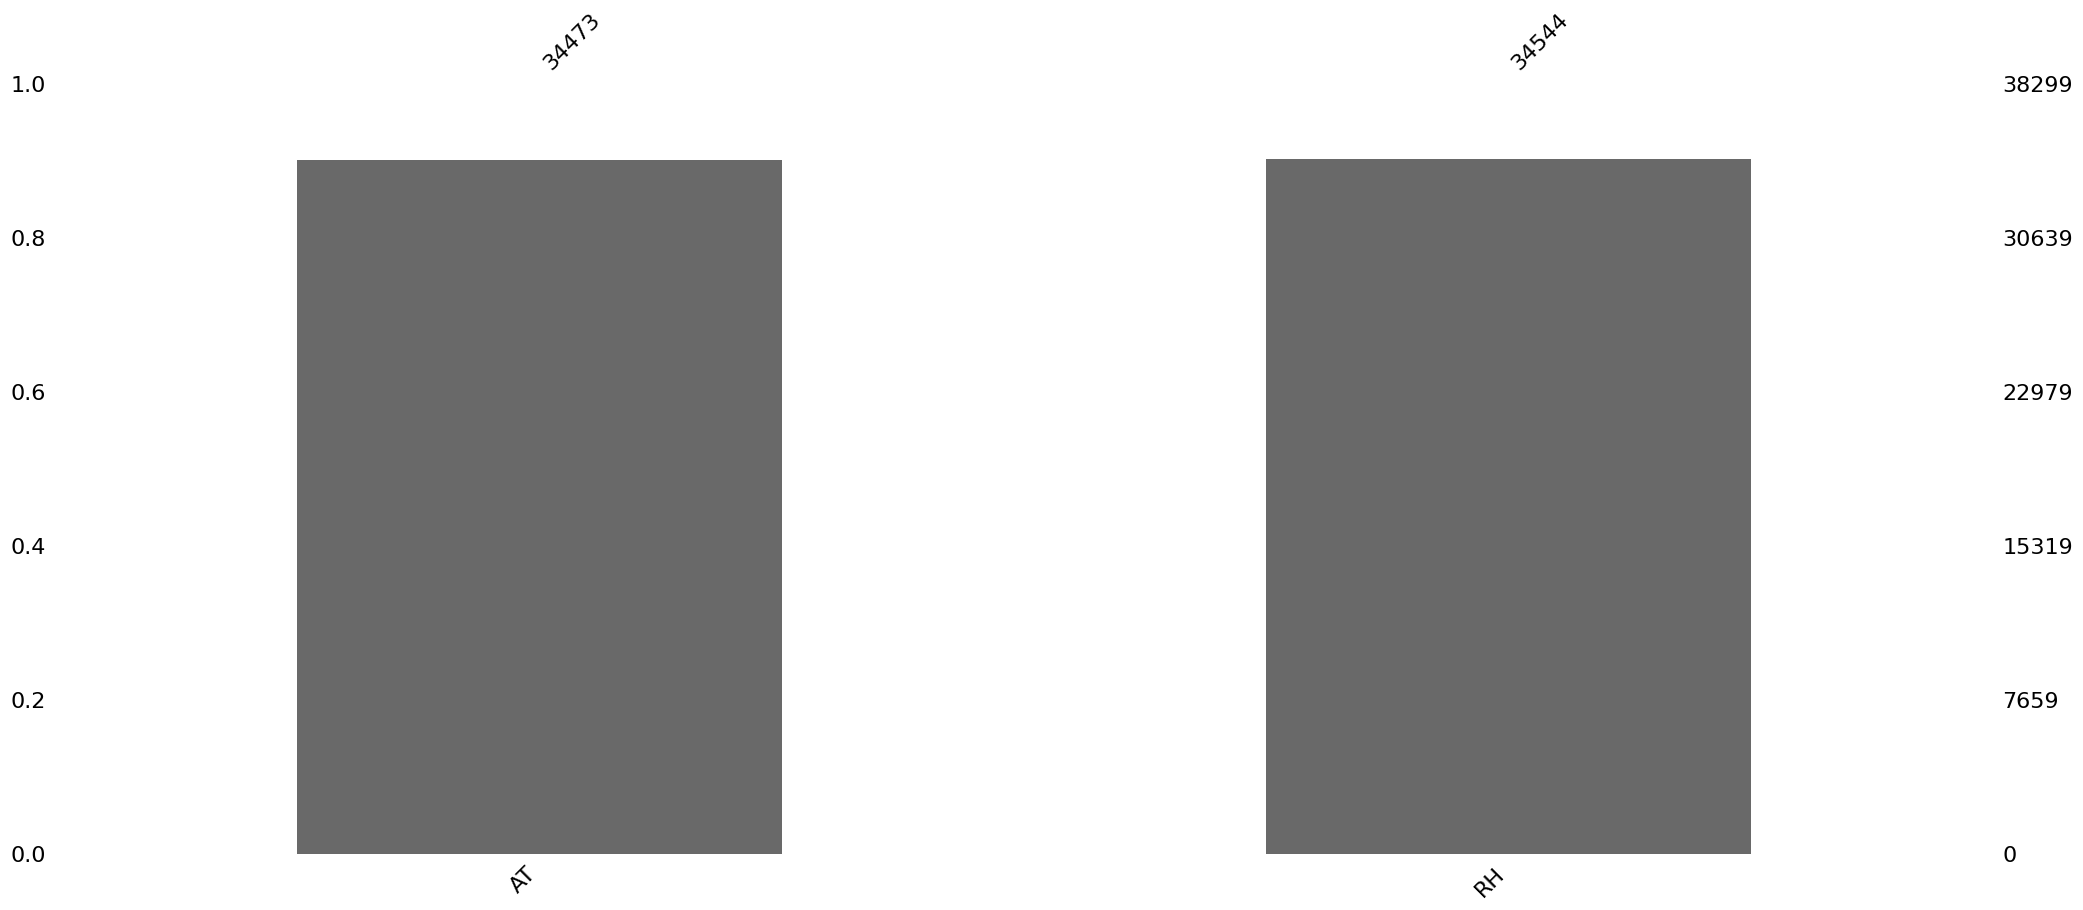

In [21]:
msno.bar(df.iloc[:,1:])

In [23]:
df['HOUR']=df['From Date'].apply(lambda x: int(x.split(' ')[1][:2]))
df.HOUR.head()

0    0
1    1
2    2
3    3
4    4
Name: HOUR, dtype: int64

In [24]:
df['From Date'] = pd.to_datetime(df['From Date'], format = '%d-%m-%Y %H:%M')
df['From Date']

0       2019-06-01 00:00:00
1       2019-06-01 01:00:00
2       2019-06-01 02:00:00
3       2019-06-01 03:00:00
4       2019-06-01 04:00:00
                ...        
38294   2023-10-13 14:00:00
38295   2023-10-13 15:00:00
38296   2023-10-13 16:00:00
38297   2023-10-13 17:00:00
38298   2023-10-13 18:00:00
Name: From Date, Length: 38299, dtype: datetime64[ns]

In [25]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date       0
AT           3826
RH           3755
HOUR            0
dtype: int64


In [26]:
df.set_index('From Date',inplace=True)

In [27]:
df['MONTH']=df.index.month     #Create month column (Run once)
df.reset_index(inplace=True)

In [28]:
# cols=['NH3','SO2','CO','Ozone','Benzene','PM2.5','PM10','NO','NO2','NOx','Eth-Benzene','MP-Xylene','O','WS','WD','AT']
cols=['AT','RH']
for col in cols:
  df[col]=df[col].fillna(df.groupby(['MONTH','HOUR'])[col].transform('mean'))

In [29]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date    0
AT           0
RH           0
HOUR         0
MONTH        0
dtype: int64


In [30]:
df.to_csv('../../data/processed/vile_cleaned.csv', index=False)

In [31]:
import pandas as pd

# Replace these filenames with your input and output file names
input_filename = "../../data/processed/vile_cleaned.csv"
output_filename = "../../data/processed/vile_cleaned.csv"

# Read the CSV file
df = pd.read_csv(input_filename)

# Calculate THI and add it as a new column
df['THI'] = df['AT'] - ((1 - df['RH'] / 100) * (df['AT'] - 14.3))

# Save the DataFrame back to a new CSV file
df.to_csv(output_filename, index=False)

In [32]:
import pandas as pd

# Replace these filenames with your input and output file names
input_filename = "../../data/processed/air_cleaned.csv"
output_filename = "../../data/processed/air_cleaned.csv"

# Read the CSV file
df = pd.read_csv(input_filename)

# Calculate THI and add it as a new column
df['THI'] = df['AT'] - ((1 - df['RH'] / 100) * (df['AT'] - 14.3))

# Save the DataFrame back to a new CSV file
df.to_csv(output_filename, index=False)

In [33]:
import pandas as pd

# Replace these filenames with your input and output file names
input_filename = "../../data/processed/kur_cleaned.csv"
output_filename = "../../data/processed/kur_cleaned.csv"

# Read the CSV file
df = pd.read_csv(input_filename)

# Calculate THI and add it as a new column
df['THI'] = df['AT'] - ((1 - df['RH'] / 100) * (df['AT'] - 14.3))

# Save the DataFrame back to a new CSV file
df.to_csv(output_filename, index=False)